<a href="https://colab.research.google.com/github/ashishpatel26/Ganpat-University-Data-Science/blob/main/Lecture_10_Fashion_MNIST_with_Artificial_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1.Load Libraries

In [62]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [14]:
print(tf.__version__)

2.4.1


### 2.Load Dataset

In [15]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-11ab71ab-ddce-8f92-f886-8d833fabf27a)


In [16]:
fashion_mnist = tf.keras.datasets.fashion_mnist

### 3.Extract train and test data from fashionMNIST

In [17]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

for i in [x_train, y_train, x_test, y_test]:
  print(f"{i.shape}")

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


### 4.Define the class as per target variable

In [18]:
class_names  = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

### 5.Data Visualization

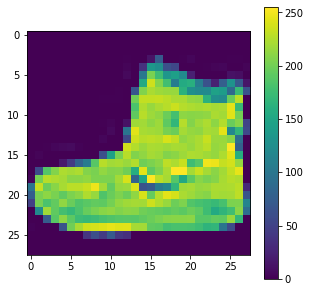

In [19]:
plt.figure(figsize=(5,5))
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

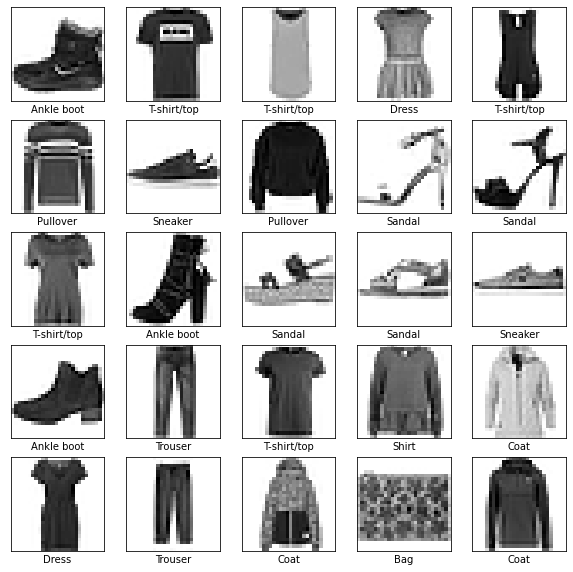

In [20]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[y_train[i]])
plt.show()

### 6. Define the Neural Network

In [21]:
model = tf.keras.Sequential()
# Input Layer
model.add(tf.keras.layers.Flatten(input_shape = x_train[0].shape))
# Hidden Layer
model.add(tf.keras.layers.Dense(128, activation='relu'))
# Output Layer
model.add(tf.keras.layers.Dense(len(class_names), activation='softmax'))

### 7. Model BackPropagation

In [22]:
# backward propagation
model.compile(optimizer='adam', # optimiser
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # cost function
              metrics = ['accuracy']
              )

### 8.Model Summary

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### 9.Model Training

In [24]:
model.fit(x = x_train,
          y = y_train,
          batch_size = 32,
          epochs = 30,
          validation_data = (x_test, y_test),
          verbose=1)

Epoch 1/30
1875/1875 [==============================] - 7s 2ms/step - loss: 9.6490 - accuracy: 0.6818 - val_loss: 0.7861 - val_accuracy: 0.7075
Epoch 2/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7003 - accuracy: 0.7309 - val_loss: 0.7666 - val_accuracy: 0.7434
Epoch 3/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6320 - accuracy: 0.7638 - val_loss: 0.6238 - val_accuracy: 0.7814
Epoch 4/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5887 - accuracy: 0.7794 - val_loss: 0.6234 - val_accuracy: 0.7708
Epoch 5/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5576 - accuracy: 0.7955 - val_loss: 0.5508 - val_accuracy: 0.8102
Epoch 6/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5204 - accuracy: 0.8171 - val_loss: 0.6191 - val_accuracy: 0.7698
Epoch 7/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5047 - accuracy: 0.8257 - val_loss: 0.5551 - val_accuracy:

### 10.Training Result Evaluation

In [25]:
import pandas as pd
pd.DataFrame(model.history.history)

,loss,accuracy,val_loss,val_accuracy
0,3.492824,0.696833,0.786073,0.7075
1,0.675246,0.739733,0.766582,0.7434
2,0.627480,0.767717,0.623835,0.7814
3,0.585166,0.783117,0.623419,0.7708
4,0.555110,0.802567,0.550765,0.8102
5,0.520853,0.819767,0.619057,0.7698
6,0.508791,0.824850,0.555051,0.8136
7,0.499049,0.826817,0.562730,0.8287
8,0.495507,0.830183,0.534465,0.8220
9,0.488957,0.832450,0.544936,0.8229


### 11. Accuracy and Loss Curve

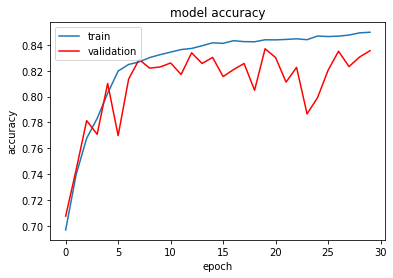

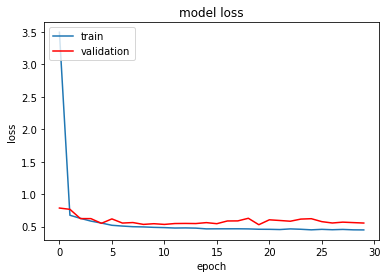

In [29]:
#  "Accuracy"
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'],color='red')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'],color='red')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### 12.Model Evaluation

In [30]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.5553 - accuracy: 0.8355


[0.5553030371665955, 0.8355000019073486]

### 13.Model Prediction

In [88]:
y_pred = model.predict(x_test)
y_pred_per = model.predict(x_test)

In [52]:
y_pred = np.argmax(y_pred, axis=1)

In [53]:
from sklearn.metrics import *

In [54]:
y_test, y_pred

(array([9, 2, 1, ..., 8, 1, 5], dtype=uint8), array([9, 4, 1, ..., 8, 1, 5]))

### 14.Model Performance

In [55]:
print("Classification Report : \n",classification_report(y_test, y_pred))
print("Accuracy :", accuracy_score(y_test, y_pred) * 100)
print("Cohen Kappa :", cohen_kappa_score(y_test, y_pred))

Classification Report : 
               precision    recall  f1-score   support

           0       0.75      0.85      0.80      1000
           1       0.97      0.95      0.96      1000
           2       0.64      0.72      0.68      1000
           3       0.86      0.80      0.82      1000
           4       0.64      0.87      0.74      1000
           5       0.96      0.94      0.95      1000
           6       0.75      0.41      0.53      1000
           7       0.92      0.95      0.94      1000
           8       0.96      0.93      0.95      1000
           9       0.96      0.94      0.95      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.83     10000
weighted avg       0.84      0.84      0.83     10000

Accuracy : 83.55
Cohen Kappa : 0.8172222222222223


In [58]:
?confusion_matrix

[[851   2  47  44   2   0  45   0   9   0]
 [  9 951   7  22   7   0   2   0   2   0]
 [ 17   2 718   8 237   0  17   0   1   0]
 [ 52  20  36 795  67   0  26   0   4   0]
 [  0   1  82  16 870   0  29   0   2   0]
 [  0   0   5   0   0 945   0  31   5  14]
 [198   1 181  40 163   0 405   0  12   0]
 [  0   0   0   0   0  21   0 950   1  28]
 [  1   0  38   3   7   3  16   1 931   0]
 [  0   0   1   0   0  12   0  48   0 939]]


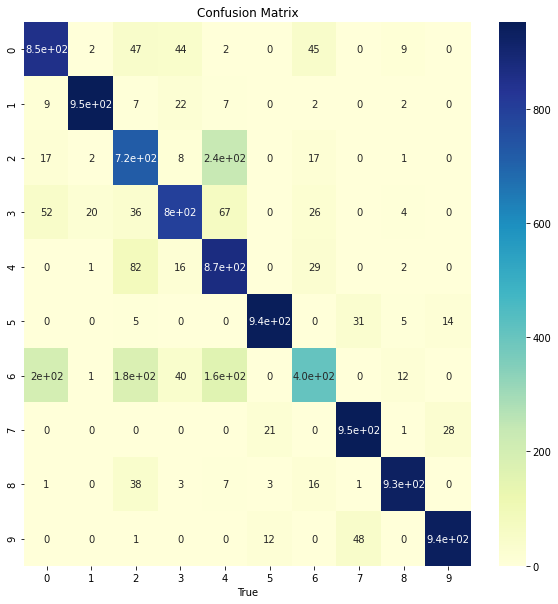

In [65]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot = True, cmap="YlGnBu")
plt.xlabel("Predicte")
plt.xlabel("True")
plt.title("Confusion Matrix")
plt.show()

In [66]:
!pip install pycm

     |████████████████████████████████| 71kB 5.1MB/s 
     |████████████████████████████████| 573kB 10.6MB/s 


In [67]:
from pycm import *

In [69]:
cm = ConfusionMatrix(actual_vector=y_test, predict_vector=y_pred)

In [70]:
cm.classes

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [71]:
print(cm)

Predict   0         1         2         3         4         5         6         7         8         9         
Actual
0         851       2         47        44        2         0         45        0         9         0         

1         9         951       7         22        7         0         2         0         2         0         

2         17        2         718       8         237       0         17        0         1         0         

3         52        20        36        795       67        0         26        0         4         0         

4         0         1         82        16        870       0         29        0         2         0         

5         0         0         5         0         0         945       0         31        5         14        

6         198       1         181       40        163       0         405       0         12        0         

7         0         0         0         0         0         21        0         950       1       

### 15.Result Visualization

In [80]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    
    if predicted_label == true_label:
      color = 'blue'
    else:
      color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 100*np.max(predictions_array), class_names[true_label]), color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

In [89]:
y_pred_per[0]

array([2.8523831e-27, 1.8574791e-24, 0.0000000e+00, 3.7751789e-26,
       0.0000000e+00, 3.2811020e-02, 0.0000000e+00, 3.7132062e-02,
       1.4221133e-20, 9.3005699e-01], dtype=float32)

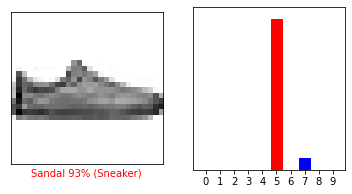

In [90]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, y_pred_per[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, y_pred_per[i],  y_test)
plt.show()

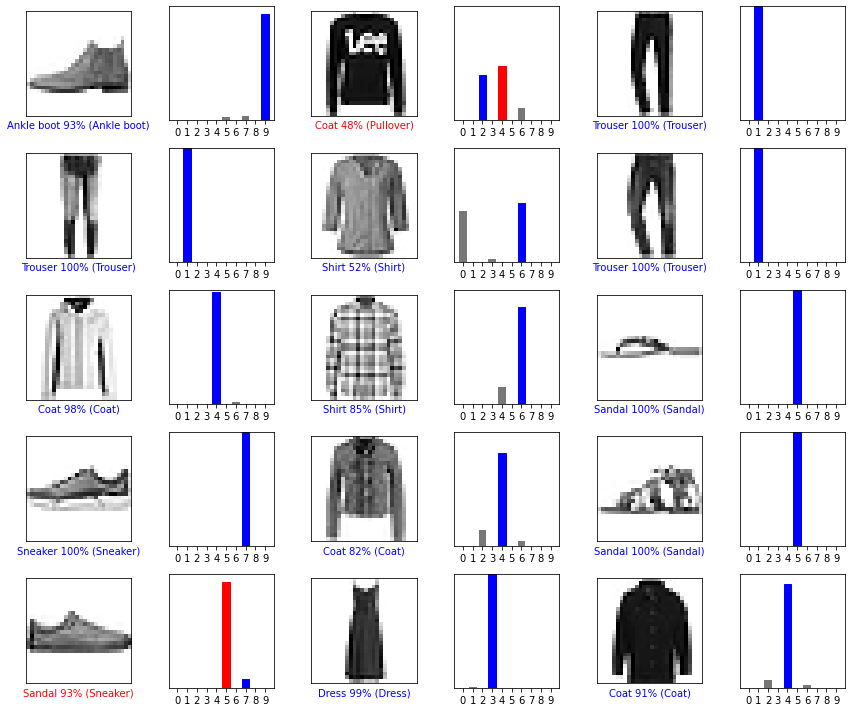

In [92]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, y_pred_per[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, y_pred_per[i], y_test)
plt.tight_layout()
plt.show()

### 16.Result for Single Image

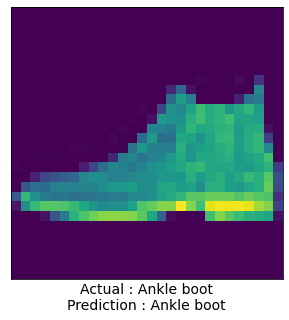

In [104]:
img = np.expand_dims(x_test[0], 0)
img_pred = class_names[np.argmax(model.predict(img))]
img_actual = class_names[y_test[0]]

plt.figure(figsize=(5,5))
plt.imshow(x_test[0])
plt.xticks([])
plt.yticks([])
plt.xlabel(f"Actual : {img_actual}\nPrediction : {img_pred}", fontsize=14)
plt.grid(False)
plt.show()